In [169]:
import os
import gzip
import pandas as pd

import numpy as np
np.random.seed(1000)

from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
plt.tight_layout()
sns.set(style="whitegrid")
sns.set_palette((sns.color_palette('colorblind', 8)))
dims = (11.7, 8.27)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import time
import datetime
import math
import random

In [173]:
def load_mnist(path, kind='train'):
    ## Load MNIST function. Retrieved from https://github.com/zalandoresearch/fashion-mnist
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

def preprocess(train, test):
    sc = StandardScaler()
    sc.fit(train)

    xform_train = sc.transform(train)
    xform_test = sc.transform(test)
    
    return xform_train, xform_test

def refresh_data():
    X_train, Y_train = load_mnist('C:/git/IST718/Lab3/data/fashion', kind='train')
    X_test, Y_test = load_mnist('C:/git/IST718/Lab3/data/fashion', kind='t10k')

    ## Transforming the data
    X_train, X_test = preprocess(X_train.astype('float64'), X_test.astype('float64'))

    ## Reducing the data to a decimal value
    X_train /= 255
    X_test /= 255
    
    return X_train, X_test, Y_train, Y_test

def int_to_desc(i):
    ## Numeric dict for each value in the dataset
    conv = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal',
            6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
    ## Try to get the value for key i, else assign unknown
    try:
        ret = conv[i]
    except:
        ret = 'Unknown'
    return ret

def check_random(n, x, y, p):
    ## Takes in integer N, X data, Y data, and predicted Y data and returns a plot with the information displayed
    rows = math.ceil(n/5)
    fig, ax = plt.subplots(nrows=rows, ncols=5, sharex=True, sharey=True,)
    ax = ax.flatten()
    for i in range(n):
        j = random.randint(0,len(p)-1)
        img = x[j].reshape(28, 28)
        if p[j] != y[j]:
            cmap = 'Reds'
        else:
            cmap = 'Greens'
        ax[i].imshow(img, cmap=cmap, interpolation='nearest')
        predicted = int_to_desc(p[j])
        actual = int_to_desc(y[j])
        ax[i].set_title('P: {}\n A: {}'.format(predicted,actual))
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [174]:
## Setting up the items to iterate through for model comparison
algos = ['ball_tree', 'kd_tree']
weights = ['uniform', 'distance']
kVals = range(1, 15, 2)

result_columns = ['algorithm', 'weight_method', 'k', 'acc', 'time']
result_df = pd.DataFrame(columns=result_columns)

In [175]:
## Iterate through each algorith, weight function, and K value and capture the results in a pandas dataframe
for algo in algos:
    for weight in weights:
        for k in kVals:
            print('Refreshing data...')
            X_train, X_test, Y_train, Y_test = refresh_data()

            print ('K = {0}, weight = {1}, algorithm = {2}'.format(k, weight, algo))

            ## Starting timer
            starttime = time.time()

            ## Compiling and fitting model
            model = KNeighborsClassifier(n_neighbors=k, weights=weight, algorithm=algo, n_jobs=3)
            fit = model.fit(X_train, Y_train)

            ## Ending timer
            endtime = time.time()

            ## Total time
            totaltime = endtime - starttime

            ## Evaluating model on test data
            score = model.score(X_test, Y_test)
            
            rownum = len(result_df)
            result_df.at[rownum, 'algorithm'] = algo
            result_df.at[rownum, 'weight_method'] = weight
            result_df.at[rownum, 'k'] = k
            result_df.at[rownum, 'acc'] = score
            result_df.at[rownum, 'time'] = totaltime

Refreshing data...
K = 1, weight = uniform, algorithm = ball_tree
Refreshing data...
K = 3, weight = uniform, algorithm = ball_tree
Refreshing data...
K = 5, weight = uniform, algorithm = ball_tree
Refreshing data...
K = 7, weight = uniform, algorithm = ball_tree
Refreshing data...
K = 9, weight = uniform, algorithm = ball_tree
Refreshing data...
K = 11, weight = uniform, algorithm = ball_tree
Refreshing data...
K = 13, weight = uniform, algorithm = ball_tree
Refreshing data...
K = 1, weight = distance, algorithm = ball_tree
Refreshing data...
K = 3, weight = distance, algorithm = ball_tree
Refreshing data...
K = 5, weight = distance, algorithm = ball_tree
Refreshing data...
K = 7, weight = distance, algorithm = ball_tree
Refreshing data...
K = 9, weight = distance, algorithm = ball_tree
Refreshing data...
K = 11, weight = distance, algorithm = ball_tree
Refreshing data...
K = 13, weight = distance, algorithm = ball_tree
Refreshing data...
K = 1, weight = uniform, algorithm = kd_tree
R

In [177]:
X_train, X_test, Y_train, Y_test = refresh_data()

## Starting timer
starttime = time.time()

## Compiling and fitting model
model = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='kd_tree', n_jobs=3)
fit = model.fit(X_train, Y_train)

## Ending timer
endtime = time.time()
## Total time
totaltime = endtime - starttime

pred = model.predict(X_test)

In [178]:
print(model.score(X_test,Y_test))


0.8542


In [182]:
print(result_df)

    algorithm weight_method   k     acc     time
0   ball_tree       uniform   1  0.8413  23.4483
1   ball_tree       uniform   3  0.8496  24.2105
2   ball_tree       uniform   5  0.8533  23.9682
3   ball_tree       uniform   7  0.8524  21.7663
4   ball_tree       uniform   9  0.8494  21.9682
5   ball_tree       uniform  11   0.849   21.683
6   ball_tree       uniform  13  0.8471  21.6847
7   ball_tree      distance   1  0.8413  21.8373
8   ball_tree      distance   3  0.8521  23.0527
9   ball_tree      distance   5  0.8535  23.1201
10  ball_tree      distance   7  0.8542   22.998
11  ball_tree      distance   9  0.8513  22.9122
12  ball_tree      distance  11  0.8514   23.187
13  ball_tree      distance  13  0.8479  23.0297
14    kd_tree       uniform   1  0.8413  22.4378
15    kd_tree       uniform   3  0.8496  22.1057
16    kd_tree       uniform   5  0.8533  22.3939
17    kd_tree       uniform   7  0.8524  22.0581
18    kd_tree       uniform   9  0.8494  22.1878
19    kd_tree       

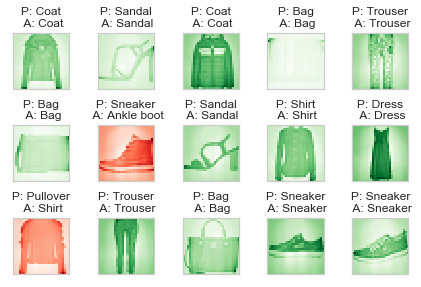

In [183]:
check_random(n=15, x=X_test, y=Y_test, p=pred)

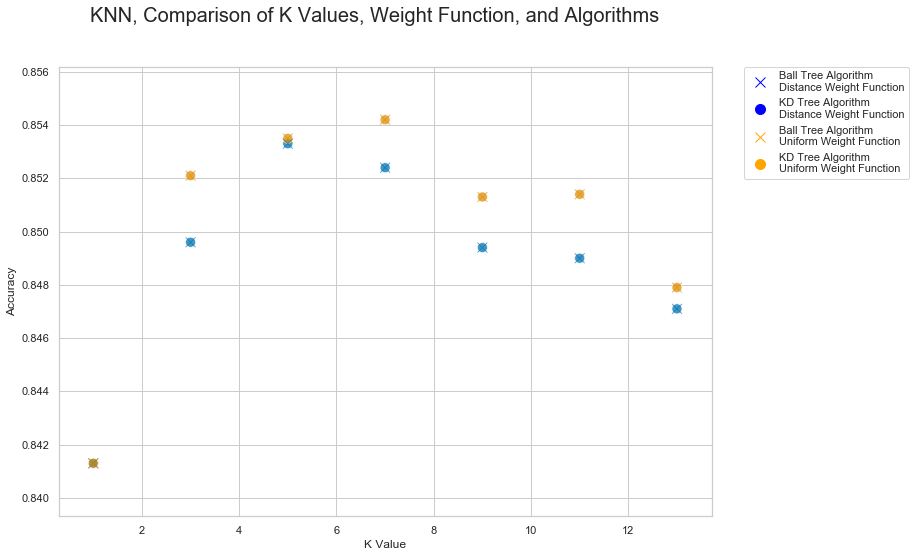

In [181]:
## Graphing the differences between K values, weight methods, and the algorithm used
fig1, ax1 = plt.subplots(figsize=dims)
plot1 = sns.scatterplot(x='k', y='acc', marker='o', hue='weight_method', data=result_df[result_df['algorithm'] == 'kd_tree'], 
                        ax=ax1, s=100, alpha=0.75)
plot1 = sns.scatterplot(x='k', y='acc', marker='x', hue='weight_method', data=result_df[result_df['algorithm'] == 'ball_tree'],
                        ax=ax1, s=100, alpha=0.75)
orange_o = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10,
                       label='KD Tree Algorithm\nUniform Weight Function')
blue_o = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10,
                       label='KD Tree Algorithm\nDistance Weight Function')
orange_x = mlines.Line2D([], [], color='orange', marker='x', linestyle='None', markersize=10,
                         label='Ball Tree Algorithm\nUniform Weight Function')
blue_x = mlines.Line2D([], [], color='blue', marker='x', linestyle='None', markersize=10,
                         label='Ball Tree Algorithm\nDistance Weight Function')
plot1 = plt.legend(handles=[blue_x, blue_o, orange_x, orange_o], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot1 = fig1.suptitle('KNN, Comparison of K Values, Weight Function, and Algorithms', fontsize=20)
plot1 = ax1.set_ylabel('Accuracy')
plot1 = ax1.set_xlabel('K Value')
plot1.get_figure().savefig('KNN_parameter_comparison.png')